In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from numpy.linalg import pinv
%matplotlib inline

# Part 1: MAP (Probabilistic Discriminative Model)

## 1. Generate two classes of data with the same population size (N1=N2=100) and sigma = 1.1

In [2]:
K = 2
N1 = 100
N2 = 100
sigma=1.1

In [3]:
#### Returns an array of X, X1, X2 and color ####
def generate_classification_data(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['maroon'] * len(X1)

    mean = (5, 5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['navy'] * len(X2)

    X = np.concatenate((X1, X2))
    color = np.concatenate((c1, c2))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, color]
    return data

def calculate_T(X, X1, X2, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=N1 and n<len(X1) + len(X2)):
            T[n][1] = 1
    T = T.astype(int)
    return T

## 2. Write code to estimate w using the MAP method, where the Gaussian prior has mean, m0 = 0, and alpha = 1.0

In [4]:
def calculate_sigmoid(w, phi):
    s = 1 / (1 + np.exp(-(w.transpose().dot(phi))))
    return s

def calculate_phi(x, typ):
    shape = x.shape
    N = shape[0]
    M = shape[1]
    phi = np.zeros([N, M])
    
    if (typ=="gaussian"):
        for n in range(0, N): 
            s = 0.25    # standard deviation
            u = 0       # mean
            for m in range(0, M):
                phi[n][m] = np.exp(-np.power(x[n][m] - u, 2)/(2*s*s))
                u += s
    elif (typ==None):
        for n in range(0, N):
            for m in range(0, M):
                phi[n][m] = x[n][m]
    
    return phi

def calculate_hessian(cov, w_prior, phi, N1, N2):
    right_side = 0
    for n in range(N1 + N2):
        phi_n = phi[n].reshape(3, 1)
        sigmoid = calculate_sigmoid(w_prior, phi_n)
        right_side += sigmoid * (1 - sigmoid) * phi_n.dot(phi_n.transpose())
    hessian = pinv(cov) + right_side
    return hessian

def calculate_delta_Ew(cov, w_prior, phi, T, N1, N2):
    right_side = 0
    for n in range(N1 + N2):
        sigmoid = calculate_sigmoid(w_prior, phi[n])
        t = np.argmax(T[n])
        right_side += (sigmoid - t) *(phi[n])
    delta_Ew  = (pinv(cov).dot(w_prior - 0).transpose() + right_side).transpose()
    return delta_Ew

def include_dummy_x(X):
    if (X.shape==(len(X[: , 0]), 3)):
        return(X)
    else:
        dummy_x = np.ones((len(X[: , 0]),1))
        X = np.hstack((X, dummy_x))
        return(X)

## 3. Show the estimated w, and Sn

In [5]:
def newton_method(w_prior, s0, phi, T, iter_num=1):
    """ 
    Steps to calculate Newton's method:
    1) w_new = w_old - hessian_inv dot delta_Ew
    2) w_new becomes w_old and used to calculate the w_new again
    """
    w_old = w_prior
    for i in range(iter_num):
        hessian = calculate_hessian(s0, w_old, phi, N1, N2)
        hessian_inv = pinv(hessian)
        delta_Ew = calculate_delta_Ew(s0, w_old, phi, T, N1, N2)
        w_new = w_old - hessian_inv.dot(delta_Ew)
        w_old = w_new
    return w_old

## 4. Draw the decision line

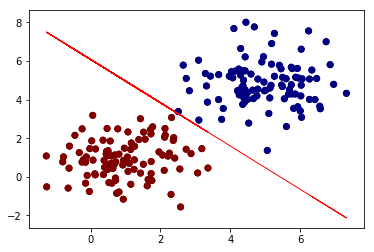

In [6]:
def plot_class_line(x1, w):
    slope = - w[0]/w[1]
    #print("Class 1 slope: %s" % slope)
    intercept = - w[2] /w[1]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='r')
    return x2

def classify(N1, N2, K, sigma, alpha=1.0):
    data = generate_classification_data(N1, N2, K, sigma)
    X = data[0]
    X1 = data[1]
    X2 = data[2]
    color = data[3]
    
    T = calculate_T(X, X1, X2, K)
    
    s0 = np.array([[alpha, 0, 0], [0, alpha, 0], [0, 0, alpha]])
    new_X = include_dummy_x(X)
    phi = calculate_phi(new_X, None)
    w_prior = np.zeros((K+1, 1))
    
    w_new = newton_method(w_prior, s0, phi, T, 1)
    x1 = new_X[: , 0]
    x2 = new_X[: , 1]
    plt.scatter(x1, x2, marker='o', c=color)
    plot_class_line(x1, w_new)
    plt.show
    
classify(N1, N2, K, sigma)

## 5. Change the number of the data of one of the clusters: N1 = 100, N2 = 5, recompute w, and draw the decision line:

In [7]:
N1 = 100
N2 = 5

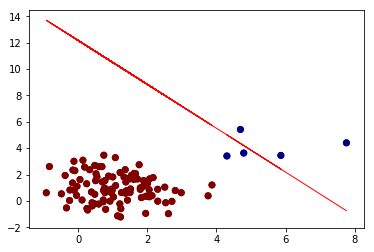

In [8]:
classify(N1, N2, K, sigma)

## 6. Generate outliers of cluster 2 where (N_outlier=100), and sigma for all clusters is 2.2, recompute w, and draw the decision line.

In [9]:
N1 = 100
N2 = 100
sigma = 2.2

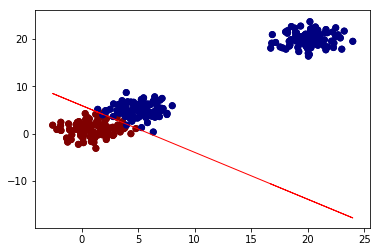

In [10]:
def generate_classification_data_2(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['maroon'] * len(X1)

    mean = (5, 5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['navy'] * len(X2)

    mean = (20, 20)
    cov =  [[sigma, 0], [0, sigma]]
    X_out = random.multivariate_normal(mean, cov, N2)
    c3 = ['navy'] * len(X_out)
    
    X = np.concatenate((X1, X2, X_out))
    color = np.concatenate((c1, c2, c3))
    fig = plt.figure()
    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color, figure = fig)
    plt.show
    
    data = [X, X1, X2, X_out, color]
    return data, fig

def calculate_T_2(X, X1, X2, X_out, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=N1 and n<len(X1) + len(X2)+len(X_out)):
            T[n][1] = 1
    T = T.astype(int)
    return T

def classify_2(N1, N2, K, sigma, alpha=1.0):
    data, mapfig = generate_classification_data_2(N1, N2, K, sigma)
    X = data[0]
    X1 = data[1]
    X2 = data[2]
    X_out = data[3]
    color = data[4]
    
    T = calculate_T_2(X, X1, X2, X_out, K)
    
    s0 = np.array([[alpha, 0, 0], [0, alpha, 0], [0, 0, alpha]])
    new_X = include_dummy_x(X)
    phi = calculate_phi(new_X, None)
    w_prior = np.zeros((K+1, 1))
    
    w_new = newton_method(w_prior, s0, phi, T, 1)
    x1 = new_X[: , 0]
    x2 = new_X[: , 1]
    plt.scatter(x1, x2, marker='o', c=color, figure=mapfig)
    plot_class_line(x1, w_new)
    plt.show
    
classify_2(N1, N2, K, sigma, alpha=1.0)

## 7. Change the prior's mean ($\mu$) and covariance ($\alpha$) to various values, and discuss how they influence the decision line. Explain how to set $\mu$ and $\alpha$ properly. 

### Changing $\mu$

In [11]:
def experiment(w_prior, s0, phi, T):
    w_new = newton_method(w_prior, s0, phi, T)
    x1 = new_X[: , 0]
    x2 = new_X[: , 1]
    plt.figure()
    plt.scatter(x1, x2, marker='o', c=color)
    plot_class_line(x1, w_new)
    plt.show

Increasing $\mu$ of the Gaussian prior in the $0^{th}$ axis decreases the gradient of the line

//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


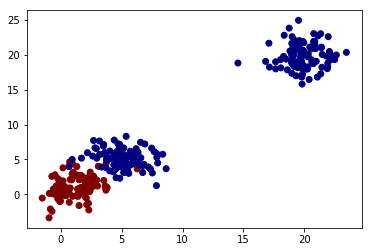

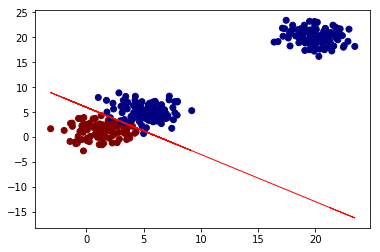

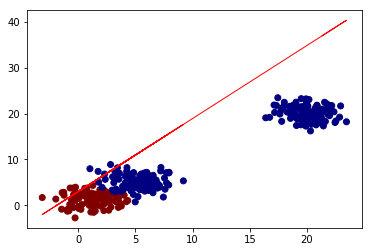

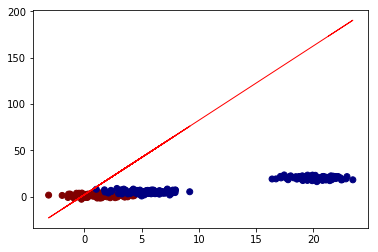

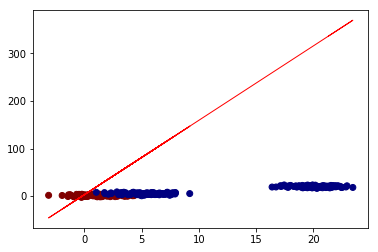

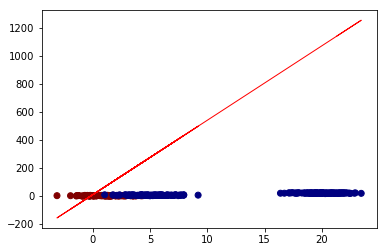

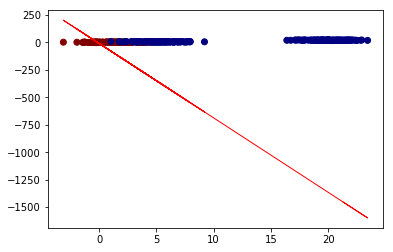

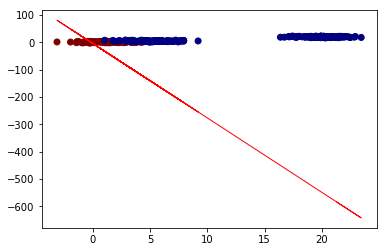

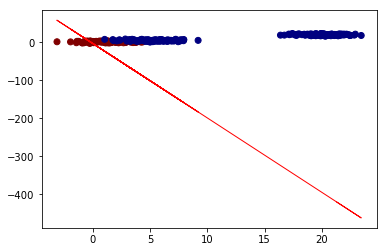

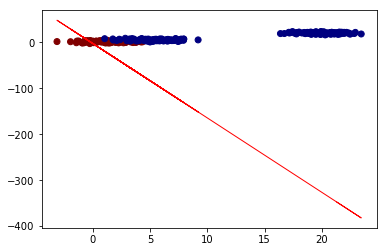

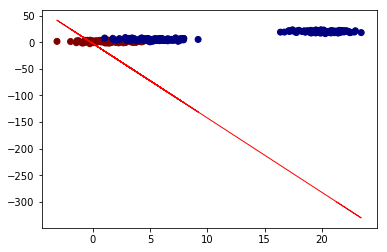

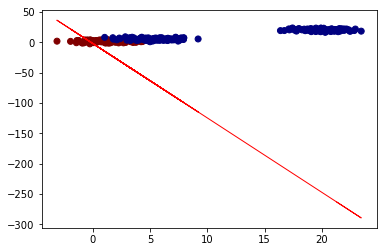

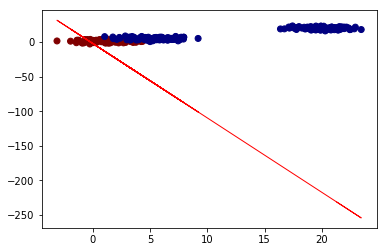

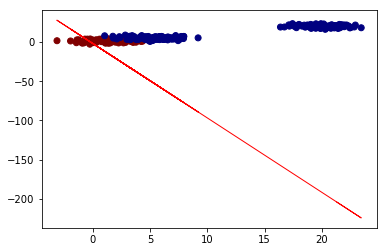

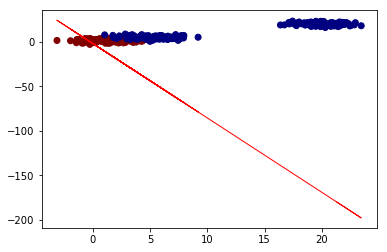

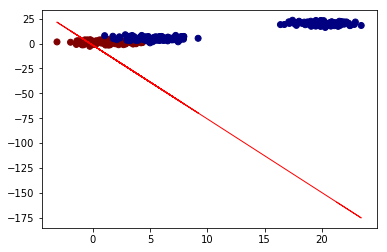

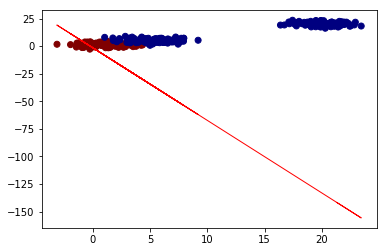

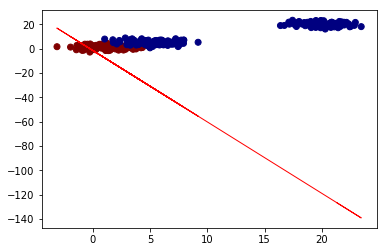

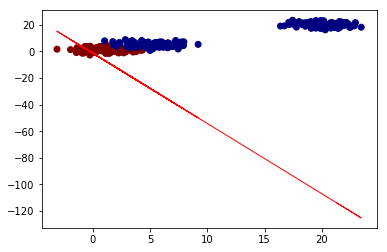

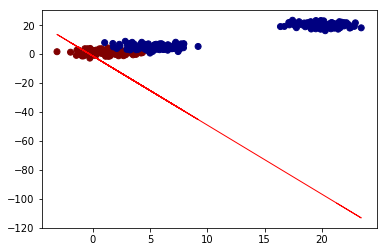

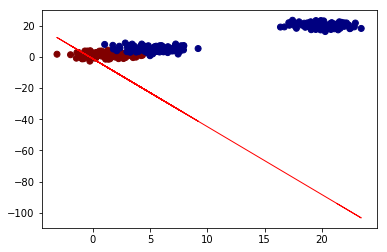

In [81]:
def setup(N1, N2, K, sigma, alpha=1.0):
    data, mapfig = generate_classification_data_2(N1, N2, K, sigma)
    X = data[0]
    X1 = data[1]
    X2 = data[2]
    X_out = data[3]
    color = data[4]

    T = calculate_T_2(X, X1, X2, X_out, K)

    s0 = np.array([[alpha, 0, 0], [0, alpha, 0], [0, 0, alpha]])
    new_X = include_dummy_x(X)
    phi = calculate_phi(new_X, None)
    return (s0, phi, T)

s0, phi, T = setup(N1, N2, K, sigma)

for i in range(20):
    w_prior = np.array([i, 0, 0])
    experiment(w_prior, s0, phi, T)

Increasing $\mu$ of the Gaussian prior in the $1^{st}$ axis rotates the decision line

//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


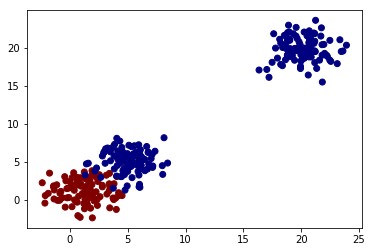

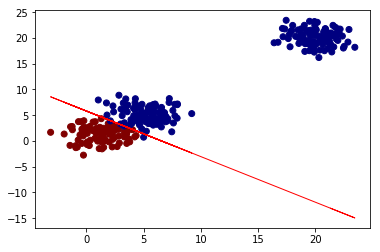

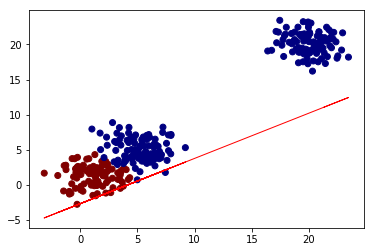

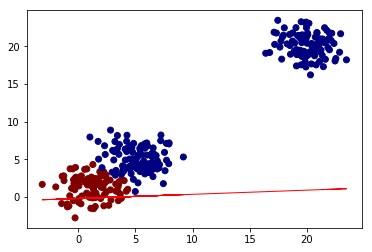

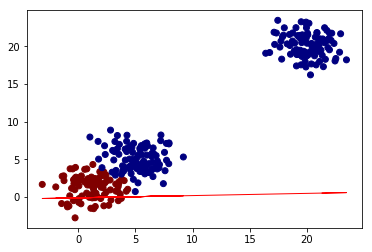

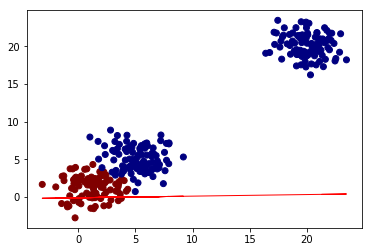

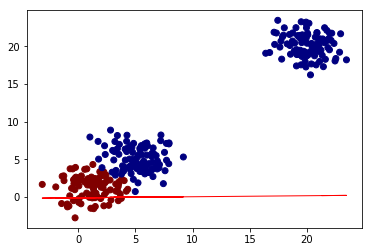

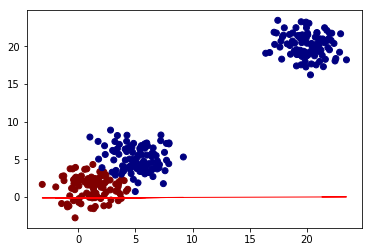

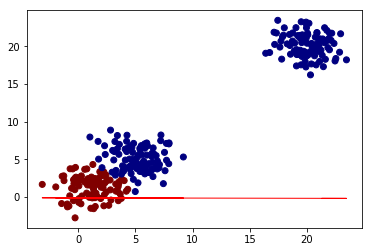

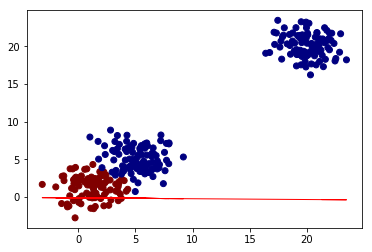

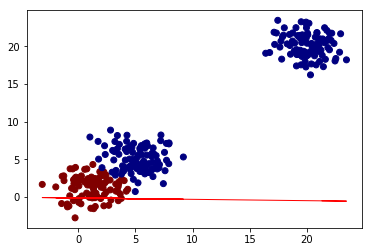

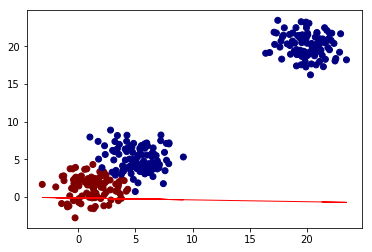

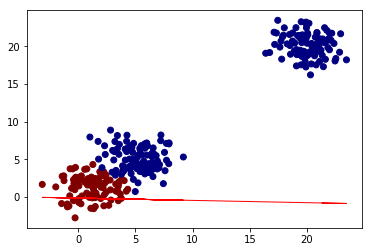

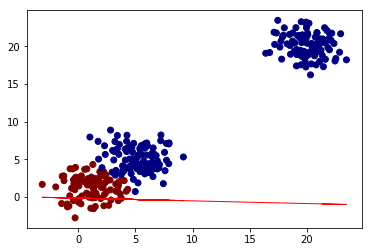

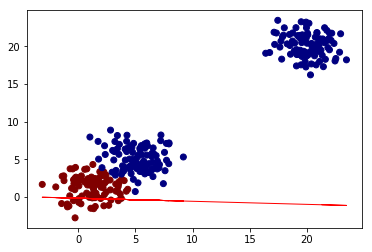

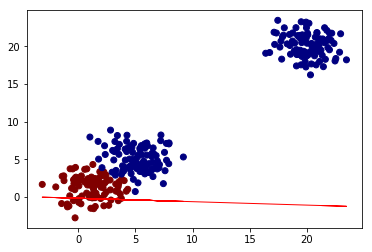

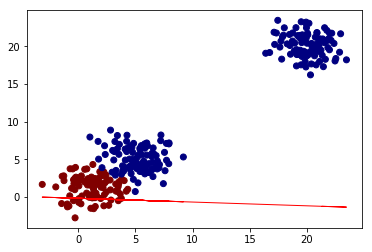

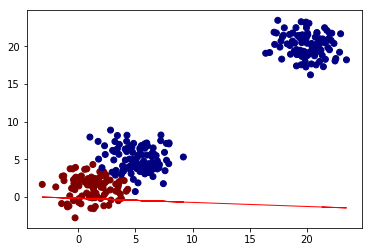

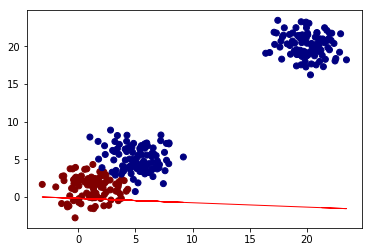

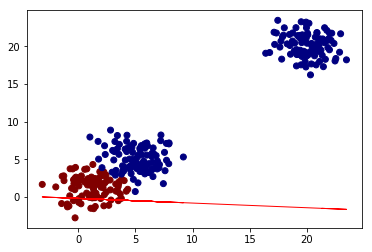

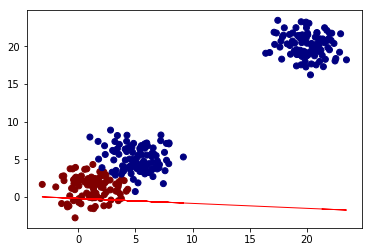

In [82]:
s0, phi, T = setup(N1, N2, K, sigma)

for i in range(20):
    w_prior = np.array([0, i, 0])
    experiment(w_prior, s0, phi, T)

Increasing $\mu$ of the Gaussian prior in the $2^{nd}$ axis takes it further away from the true decision line

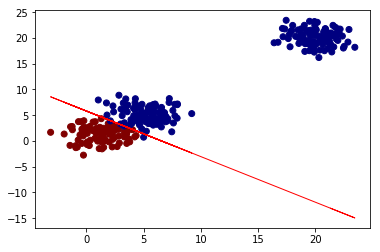

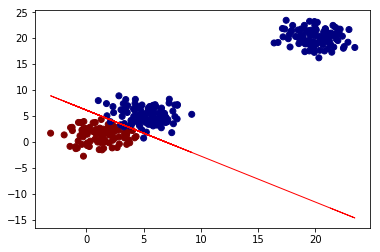

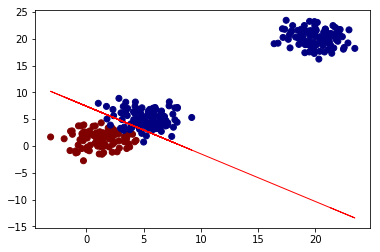

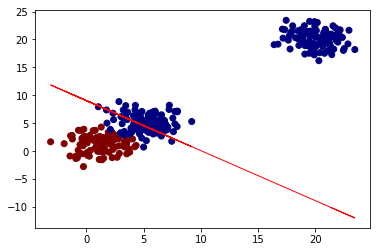

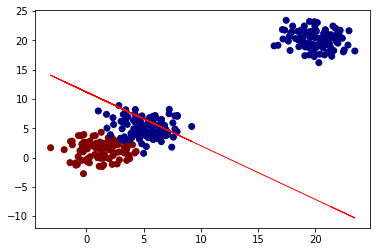

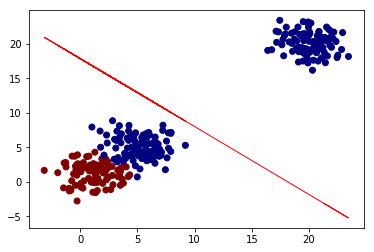

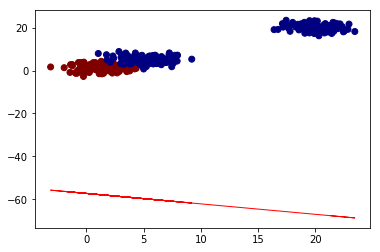

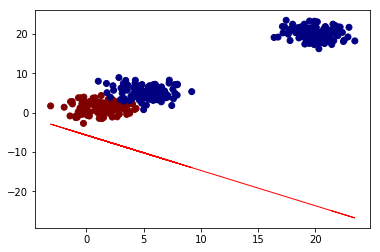

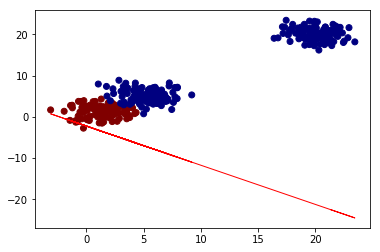

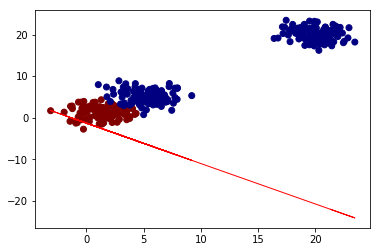

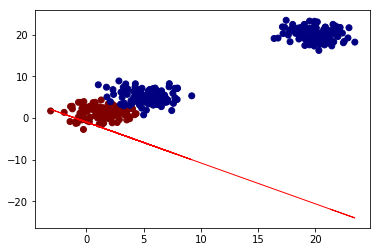

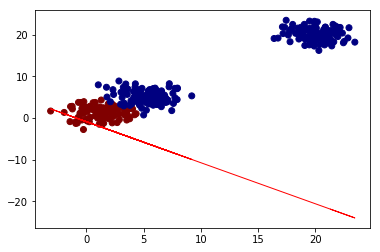

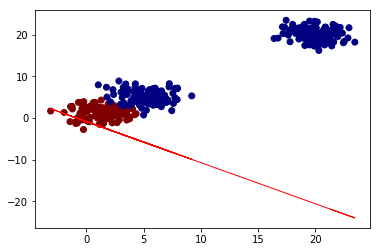

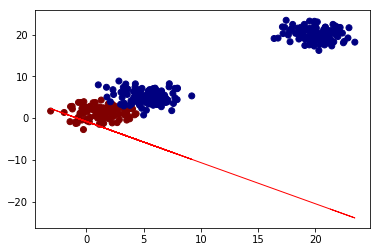

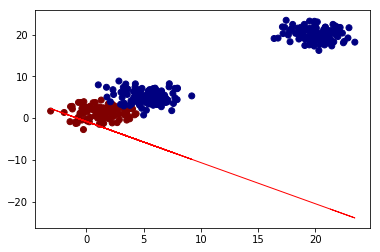

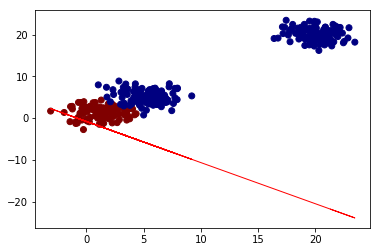

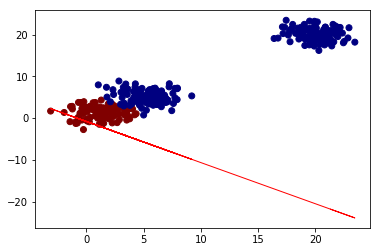

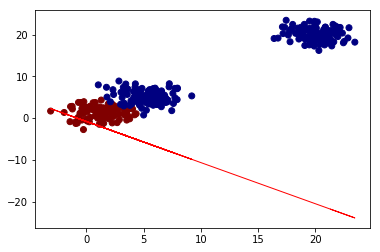

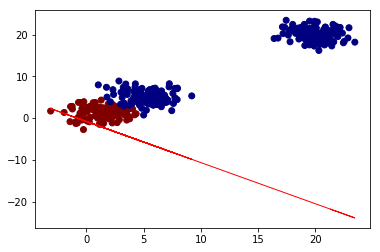

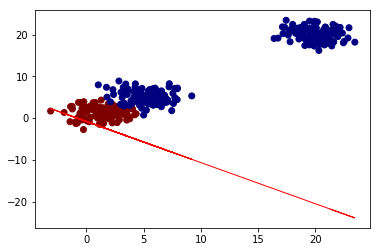

In [83]:
for i in range(20):
    w_prior = np.array([0, 0, i])
    experiment(w_prior, s0, phi, T)

### Changing $\alpha$

In [84]:
def experiment_alpha(w_prior, s0, phi, T):
    w_new = newton_method(w_prior, s0, phi, T)
    x1 = new_X[: , 0]
    x2 = new_X[: , 1]
    plt.figure()
    plt.scatter(x1, x2, marker='o', c=color)
    plot_class_line(x1, w_new)
    plt.show

### Low $\alpha$

A low $\alpha$ keeps the decision line in the right slope. The following graphs hold regardless of what variations in w_prior you give it

//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


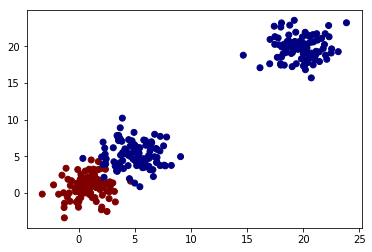

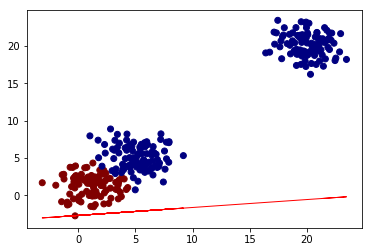

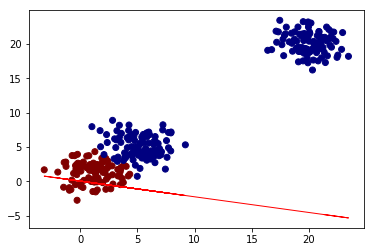

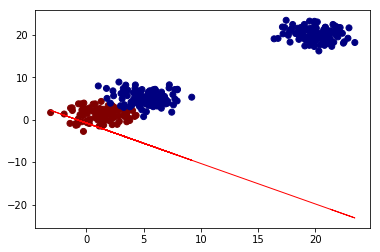

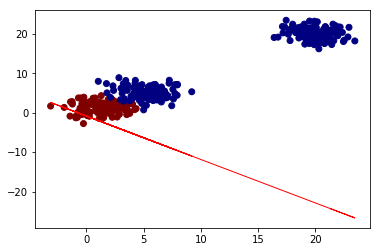

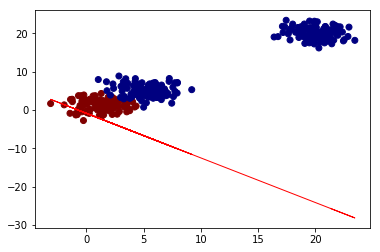

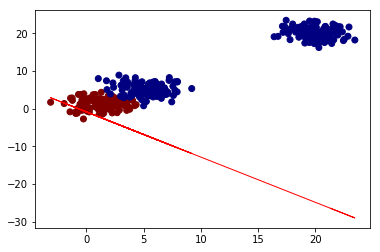

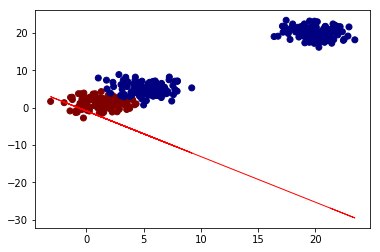

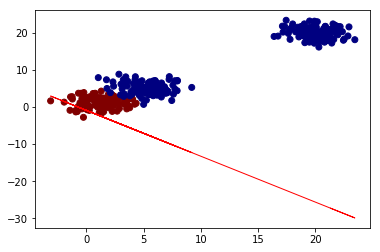

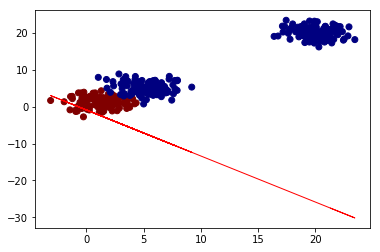

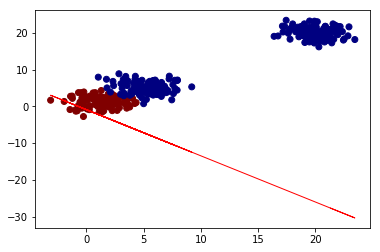

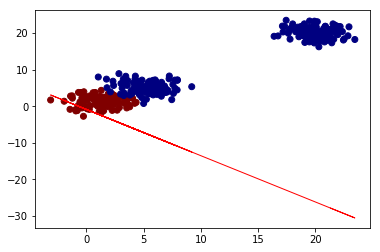

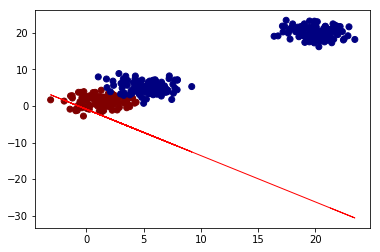

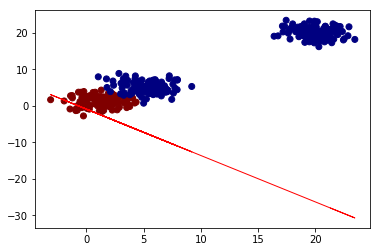

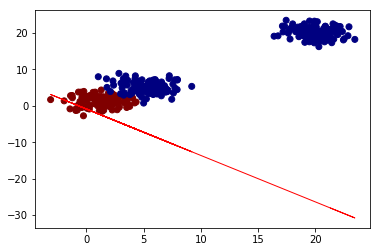

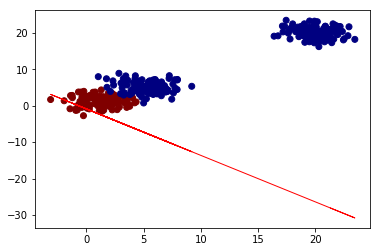

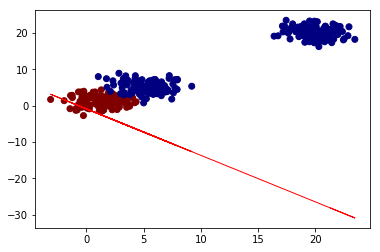

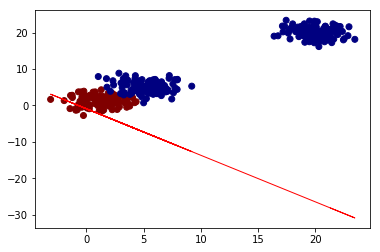

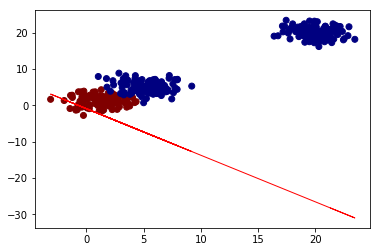

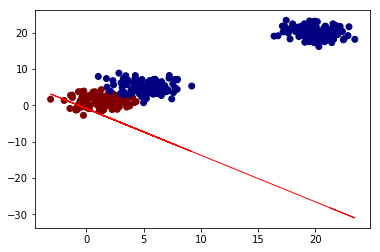

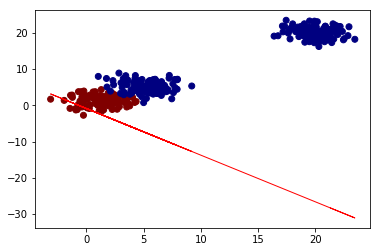

In [85]:
s0, phi, T = setup(N1, N2, K, sigma, alpha=-0.01)
for i in range(20):
    w_prior = np.array([i, 0, 0])
    experiment_alpha(w_prior, s0, phi, T)


### How to set $\mu$ and $\alpha$ properly

When $\mu$ is $[0, 0, 0]$, there is no need to set $\alpha$ to a value other than $1.0$. However, with a different gaussian prior, $\alpha$ should be set to as low as possible to minimize errors in classification. Caveat: Don't set it beyond a value bigger than an order of magnitude of -3. This will cause the line to stray away from the true decision line. 

## 8. Discuss how the MAP performs compared to Fisher's LDA, and show the comparison results between the two.



The MAP is a lot more consistent than Fisher's LDA because of the regularization term that prevents the decision line from fluctuating with each run. However Fisher's LDA does a better job at classifying. 

Fisher's LDA result


NameError: name 'fisherfig' is not defined

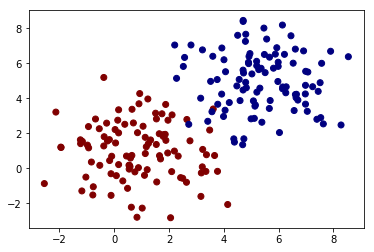

In [87]:
def calculate_Sw_inv(X, X1, X2, mu1, mu2):
    class1_cov = class2_cov = []
    for n in range(len(X)):
        if (n<len(X1)):
            class1_cov = ((X - mu1).transpose()).dot(X - mu1)
        if (n>=len(X1) and n<len(X1) + len(X2)):
            class2_cov = ((X - mu2).transpose()).dot(X - mu2)
    Sw = class1_cov + class2_cov
    Sw_inv = pinv(Sw)
    return Sw_inv

def calculate_w_fisher(Sw_inv, mu1, mu2):
    mean_diff = np.subtract(mu2, mu1).reshape((2,1))
#     print(mean_diff)
    w = Sw_inv.dot(mean_diff)
    return w
# print("w = %s" % w)

def calculate_w0(X, w):
    m = np.average(X, axis=0)
    w0 = w.transpose().dot(m)
    return w0

# print(w0)
def plot_fisher_line(x1, w, w0):
    slope = -w[0] / w[1]
#     print("slope: %s" % slope)
    intercept = w0 / w[1]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='r', figure = fisherfig)

data, fisherfig = generate_classification_data(N1, N2, K, sigma)
X = data[0]
X1 = data[1]
X2 = data[2]
mu1 = (np.mean(X1[:,0]), np.mean(X1[:,1]))
mu2 = (np.mean(X2[:,0]), np.mean(X2[:,1]))
Sw_inv = calculate_Sw_inv(X, X1, X2, mu1, mu2)
w = calculate_w_fisher(Sw_inv, mu1, mu2)
w0 = calculate_w0(X, w)
x1 = new_X[: , 0]
print("Fisher's LDA result")
plot_fisher_line(x1, w, w0)

In [ ]:
print("MAP result:")
mapfig

# Part 2: Predictive Distribution: Linear Classification

## 1. Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2

## 2. Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.

In [14]:
def generate_classification_data(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['maroon'] * len(X1)

    mean = (5, 5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['navy'] * len(X2)

    X = np.concatenate((X1, X2))
    color = np.concatenate((c1, c2))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, color]
    return data

def setup(N1, N2, K, sigma, alpha=1.0):
    data= generate_classification_data(N1, N2, K, sigma)
    X = data[0]
    X1 = data[1]
    X2 = data[2]
    color = data[3]

    T = calculate_T(X, X1, X2, K)

    s0 = np.array([[alpha, 0, 0], [0, alpha, 0], [0, 0, alpha]])
    new_X = include_dummy_x(X)
    phi = calculate_phi(new_X, None)
    return (s0, phi, T)

def calculate_Sn(w_map, phi, s0):
    left_side = 0
    for n in range(300):
        sigmoid = calculate_sigmoid(w_map, phi)
        left_side += sigmoid * (1 - sigmoid) * phi.dot(phi.transpose())
    S_n = left_side + pinv(s0)
    return S_n

def prediction_prob(sigmoid_input):
    s = 1 / (1 + np.exp(-sigmoid_input))
    return s

Please input a value for x1: 10
Please input a value for x2: 10
x lies in the blue class with certainty 50.7988720627 percent


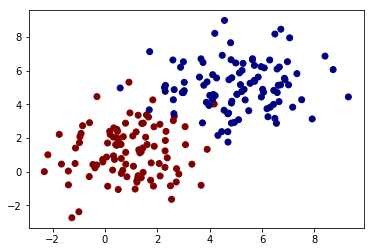

In [20]:
x1 = input("Please input a value for x1: ")
x2 = input("Please input a value for x2: ")

def predict(x1, x2):
    x = np.array([x1, x2, 1])
    x = x.reshape((3, 1))
    
    s0, phi, T = setup(N1, N2, K, sigma)
    w_prior = np.zeros((K+1, 1))
    w_new = newton_method(w_prior, s0, phi, T)
    w_map = w_new
    
    phi_x = calculate_phi(x, None)
    s_n = calculate_Sn(w_map, phi_x, s0)
    var_star = phi_x.T.dot(s_n).dot(phi_x)
    if (var_star < 0):
        var_star = -var_star
    var_star = var_star[0][0]
    mu_star = w_map.T.dot(phi_x)[0][0]

    sigmoid_input = mu_star / (np.sqrt(1 + np.pi / 8 * var_star))

    s = prediction_prob(sigmoid_input)
    if (s < 0.5):
        print("x lies in the red class with certainty %s percent" % ((1-s) * 100))
    elif (s >= 0.5):
        print("x lies in the blue class with certainty %s percent" % (s * 100))
        
predict(x1, x2)
    